In [2]:
# Perceptron
from numpy import exp, array, random, dot
training_set_inputs =array([[0,0,1],
[1,1,1],
[1,0,1],
[0,1,1]])
training_set_outputs = array([[0, 1,1, 0]]). T
random.seed(1)
synaptic_weights =2*random.random((3,1))-1
for iteration in range(20):
    input_dot_weights=dot(training_set_inputs, synaptic_weights)
    output =1/(1+exp(-(input_dot_weights))) #sigmoid
    synaptic_weights += dot(training_set_inputs. T, (training_set_outputs - output) *
    output * (1-output))
print (1/(1+exp(-(dot(array([1,0,0]),synaptic_weights)))))

[0.9279089]


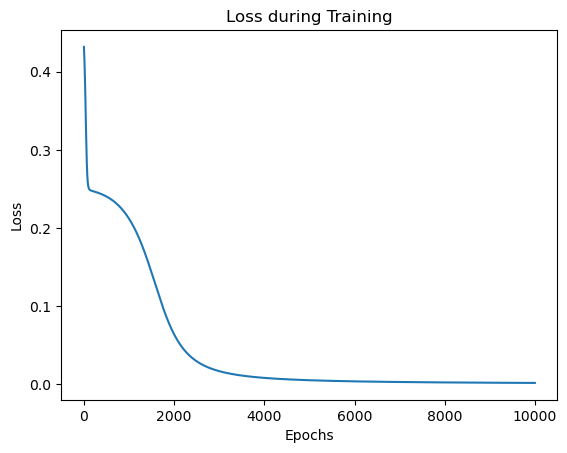

Predicted output after training (raw values):
[[0.03359933]
 [0.95995336]
 [0.96042263]
 [0.04531723]]

Predicted output after applying threshold (binary classification):
[0, 1, 1, 0]

Actual output:
[0 1 1 0]

Accuracy on Training Data: 100.00%

Predicted output for new input [1, 0, 0]: [[0.0180776]]


In [1]:
# Backpropagation 

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Function to calculate accuracy
def accuracy(predicted, actual):
    # Flatten the predicted output to avoid shape mismatch
    predicted = predicted.flatten()
    actual = actual.flatten()

    # Apply thresholding to the predicted values
    predicted_binary = [1 if p >= 0.5 else 0 for p in predicted]

    # Calculate accuracy as the proportion of correct predictions
    return np.mean(np.array(predicted_binary) == actual)

# Input data (4 samples, 3 features each)
X = np.array([[0, 0, 1],
              [0, 1, 1],
              [1, 0, 1],
              [1, 1, 1]])

# Output labels (4 samples, 1 output each)
y = np.array([[0], [1], [1], [0]])

# Seed random numbers for reproducibility
np.random.seed(42)

# Initialize weights randomly with mean 0
weights_input_hidden = np.random.randn(3, 4)  # 3 input features, 4 hidden neurons
weights_hidden_output = np.random.randn(4, 1) # 4 hidden neurons, 1 output

# Learning rate
learning_rate = 0.1

# List to store loss values for plotting
loss_list = []

# Training the network (10,000 iterations)
for epoch in range(10000):
    # Forward propagation
    hidden_layer_input = np.dot(X, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    predicted_output = sigmoid(output_layer_input)

    # Calculate error
    error = y - predicted_output
    loss = np.mean(np.square(error))  # Mean Squared Error (MSE)
    loss_list.append(loss)  # Store loss for graph plotting

    # Backpropagation using gradient descent
    # Output layer adjustment
    d_predicted_output = error * sigmoid_derivative(predicted_output)
    weights_hidden_output += np.dot(hidden_layer_output.T, d_predicted_output) * learning_rate

    # Hidden layer adjustment
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
    d_hidden_layer_output = error_hidden_layer * sigmoid_derivative(hidden_layer_output)
    weights_input_hidden += np.dot(X.T, d_hidden_layer_output) * learning_rate

# Plotting the loss over iterations
plt.plot(loss_list)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

# Print predicted output for training data
print("Predicted output after training (raw values):")
print(predicted_output)

# Apply threshold to predicted output for classification (0 or 1)
predicted_output_thresholded = [1 if p >= 0.5 else 0 for p in predicted_output.flatten()]
print("\nPredicted output after applying threshold (binary classification):")
print(predicted_output_thresholded)

# Compare with actual output
print("\nActual output:")
print(y.flatten())

# Calculate accuracy on the training data
train_accuracy = accuracy(predicted_output, y)
print(f"\nAccuracy on Training Data: {train_accuracy * 100:.2f}%")

# Test with new input after training
new_input = np.array([[1, 0, 0]])  # New input to test after training
hidden_layer_input_test = np.dot(new_input, weights_input_hidden)
hidden_layer_output_test = sigmoid(hidden_layer_input_test)

output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output)
predicted_output_test = sigmoid(output_layer_input_test)

print("\nPredicted output for new input [1, 0, 0]:", predicted_output_test)


Overfitting - If the model is overfitting, it may perform exceptionally well on the training data but poorly on the validation data because it has learned to recognize noise rather than the actual underlying pattern.
Complex Model: The model has too many parameters relative to the amount of training data.
High Capacity: It captures noise in the training data instead of the underlying distribution.
Insufficient Data: Not enough training examples for the model to learn general patterns.
Too Many Epochs: Training for too long can lead to memorization of the training data.
Lack of Regularization: Absence of techniques like L1/L2 regularization or dropout to constrain the model.
High Feature Count: Too many features (especially irrelevant ones) increase the risk of overfitting.
Underfitting - If the model is underfitting, it won't capture the complexity of the data, leading to poor performance on both training and validation sets.
Too Simple Model: The model is too simplistic to capture the underlying patterns in the data.
Insufficient Training: Not enough epochs or iterations for the model to learn adequately.
High Bias: The model has inherent assumptions that do not fit the training data well.
Feature Engineering Issues: Important features may be missing, or the representation of features may not be effective.
Improper Model Selection: Choosing an inappropriate model for the problem at hand (e.g., linear regression for non-linear data).
Data Preprocessing Issues: Poorly preprocessed data can lead to loss of information that the model needs to learn from.
Suggestions for Improvement
Adjust Model Complexity: You can experiment with different architectures (number of layers, neurons per layer) to see how it affects the model's ability to generalize.
More Data: Sometimes, having more training data can help the model learn better.
Regularization: Techniques like L1/L2 regularization or dropout can help prevent overfitting.
Early Stopping: Monitor the validation loss during training and stop when it starts to increase, indicating potential overfitting.
The training data is used to fit the model. This means that during training, the model learns patterns from this data to minimize the loss function. The validation data is a separate set used to evaluate the model's performance after training. This data helps to assess how well the model generalizes to unseen data. The red line in your plots is a visual representation of how well the neural network has learned to model the relationship between the input data (X) and the output data (y). It is the result of the predictions made by the model and varies with the complexity of the model used in each subplot. Thus, it is not a boundary separating the data points but a continuous function (or curve) approximating the target output based on the neural network's learning from the training data.